# **Decision Trees**
# **&**
# **Random Forest**
## **Efsanevi Pokemonlar**

## Data & Import

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


---
## EDA yok zaten yaptık

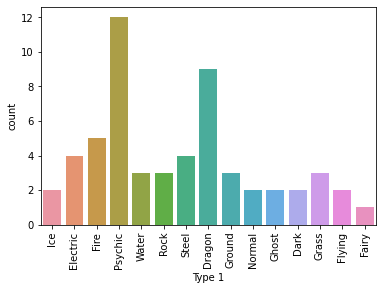

In [12]:
sns.countplot(x="Type 1", data=df[df["Legendary"] == True])
plt.xticks(rotation=90);

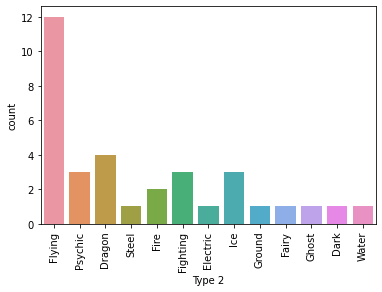

In [13]:
sns.countplot(x="Type 2", data=df[df["Legendary"] == True])
plt.xticks(rotation=90);

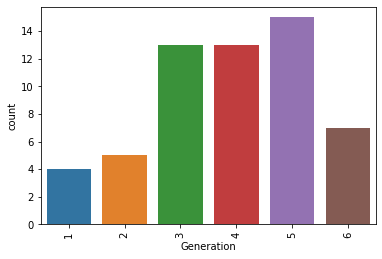

In [14]:
sns.countplot(x="Generation", data=df[df["Legendary"] == True])
plt.xticks(rotation=90);

---
## Train Test Split

In [15]:
df = pd.get_dummies(df.drop(["#", "Name"], axis=1),drop_first=True)

In [16]:
df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 1_Dark,...,Type 2_Ghost,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,318,45,49,49,65,65,45,1,False,0,...,0,0,0,0,0,1,0,0,0,0
1,405,60,62,63,80,80,60,1,False,0,...,0,0,0,0,0,1,0,0,0,0
2,525,80,82,83,100,100,80,1,False,0,...,0,0,0,0,0,1,0,0,0,0
3,309,39,52,43,60,50,65,1,False,0,...,0,0,0,0,0,0,0,0,0,0
4,405,58,64,58,80,65,80,1,False,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X = df.drop("Legendary", axis=1)
y = df["Legendary"]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=9)

---
## Decision Tree Model

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
decision_tree = DecisionTreeClassifier()

In [22]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
tree_legend_pred = decision_tree.predict(X_test)

---
## Decision Tree Değerlendirme

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

In [30]:
accuracy_score(y_test,tree_legend_pred)

0.9775784753363229

In [36]:
cm_tree = confusion_matrix(y_test, tree_legend_pred)

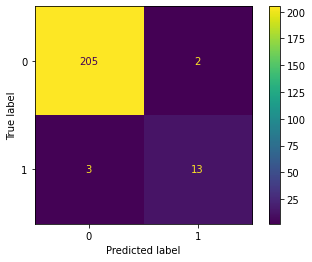

In [37]:
cfm_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree)
cfm_tree.plot()

In [39]:
print(classification_report(y_test, tree_legend_pred))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       207
        True       0.87      0.81      0.84        16

    accuracy                           0.98       223
   macro avg       0.93      0.90      0.91       223
weighted avg       0.98      0.98      0.98       223



---
## Random Forest Model

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
random_model = RandomForestClassifier(n_estimators=3, max_features="sqrt", random_state=9)

In [42]:
random_model.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=3, random_state=9)

In [43]:
random_pred = random_model.predict(X_test)

---
## Random Forest Değerlendirme

In [45]:
accuracy_score(y_test,random_pred)

0.9820627802690582

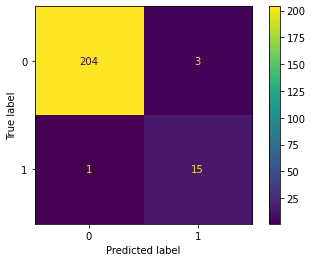

In [46]:
cm_tree = confusion_matrix(y_test, random_pred)
cfm_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree)
cfm_tree.plot()

In [48]:
print(classification_report(y_test, random_pred))

              precision    recall  f1-score   support

       False       1.00      0.99      0.99       207
        True       0.83      0.94      0.88        16

    accuracy                           0.98       223
   macro avg       0.91      0.96      0.94       223
weighted avg       0.98      0.98      0.98       223



# **https://www.youtube.com/watch?v=fCkeLBGSINs**